# Куприянов Артем

# 599 группа

# Сложность вычислений ФИВТ МФТИ 2017.

# 1. Введение

### (Задача 53 из списка) 
## Поиск наименее плотного разреза 

Требуется разбить вершины графа на 2 группы, так чтобы отношения числа рёбер между ними к размеру меньшей группы было как можно меньше. Имплементируйте алгоритм Лейтона–Рао приближённого решения с точностью $O(log(n))$.  
(Можно и алгоритм Ароры–Рао–Вазирани с точностью $O(\sqrt{log(n)})$, но это значительно сложнее).

Задача **Sparsest cut** является $NP$ - трудной --- этот факт доказан в статье [4]

В данной работе рассмотрен задача **sparsest cut**. Рассмотрен и имплементирован алгоритм Лейтона–Рао приближённого решения с точностью $O(log(n))$ и расмотрен алгоритм Ароры–Рао–Вазирани с точностью $O(\sqrt{log(n)})$. 

# 2. Алгоритм Лейтона-Рао поиска приближённого решения за $O(log(n))$

**Разрезом** называется такое разбиение множества $V$ на два подмножества $A$ и $B$, что:
1. $A, B \subset V$
2. $A, B \neq \emptyset$
3. $A \cap B = \emptyset$
4. $A \cup B = V$

Пусть дан граф $G (V, E)$. Множество $S: \ \emptyset = S \subset V$ и $V$ \ $S$ образуют разрез графа $G$.  
Введем понятие **отностельного веса разреза**:
$$
\phi_{G}(S) = \dfrac{Edges(S, V \backslash S)}{|S||V \backslash S|}
$$

где $Edges(S, V \backslash S) = \{(u, v) \in E(G)  \ | \ u \in S, \ v \in V \backslash S\}$

Перепишем формулу для отностильного веса разреза в более уднобном для нас виде:

$$\phi_{G}(S) = \dfrac{\sum_{i, j} adj_{i,j} | I(i \in S) - I(j \in S)| }{\sum_{i, j}| I(i \in S) - I(j \in S)|}$$

где $adj_{i, j}$ -- **матрица смежности** для данного графа $G$, $I(i \in S)$ -- индикаторная функция принадлежности $i$ к $S$

Тогда, в новых терминах, мы хотим минимизировать величину $\phi_{G}(S)$ для заданного графа $G$.

Положим $$\phi(G) = \min\limits_{\emptyset \neq S \subset V} \phi_{G}(S)$$

Введем понятие полуметрики:

Для данного множества $M$ M, функция $ d\colon M\times M\to \mathbb {R} $ называется **полуметрикой** на  $M$ если для любых точек $ x,\;y,\;z $ из $M$ она удовлетворяет следующим условиям:
* $d(x,\;x)=0$

* $d(x,\;y)=d(y,\;x)$

* $d(x,\;z)\leqslant d(x,\;y)+d(y,\;z)$

Понятно, что $d^*(i, j) = {\sum_{i, j}| I(i \in S) - I(j \in S)|} $ является полуметрикой


**Релаксация Лейтона-Рао**: будем использовать не $d^*(i, j)$, а некоторую другую полуметрику и возьмем минимум по всем так функциям:

$LR(G) = \min\limits_{d\colon M\times M\to \mathbb {R}, \ \  d -- полуметрика}  \dfrac{\sum_{i, j} adj_{i,j} \ d(x,\;y) }{\sum_{i, j} d(x,\;y)}$

**Решение релаксированной задачи**

Решение релаксирвоанной задачи может быть получино с помощью ЛП. Составим задачу ЛП:

$$min \ \ \sum_{i, j} adj_{i,j} \ d(i,\;j) $$
$$ \sum_{i, j} d(i,\;j) = 1 $$
$$ \forall \ i, \ j \ \ \ d(i,\;j) \geq 1 $$
$$ \forall \ i, \ j, \ k \ \ \ d(i,\;j) + d(j,\;k) \geq  d(i,\;k) $$

### Точность релаксации Лейтона-Рао 

Для некоторой константы $C$ и любого графа $G$ выполняется неравенство

$$LR(G) \leq \phi(G) \leq C  \log |V| \ LR(G)$$


Формальное доказательство приведено в [1]. Приведем ключевые моменты:

**Первое неравенство**
* очевидно: минимум по множество, не больше минимума по подмножеству

**Второе неравенство**

Для доказательства второго неравенства дадим формулировку фактов, под названиями **Лемма об оптимальности $l^1$  полуметрик** и **теорема Бургейна.

**Лемма об оптимальности $l^1$  полуметрик** Для любого графа $G$ выполнено, что $\phi(G) = \phi_1(G)$, отличие $\phi_1$ от $\phi$ в том, что в первой минимум берется только по всем $l^1$ - полуметрикам ($l^1$ - полуметрики -- полуметрики вида $|| f(u) - f(v) ||_{1}$) 

**Теорема Бургейна:** Существует такая константа $C$, что для любой полуметрики $ d\colon V\times V\to \mathbb {R} $ на n-элементном множестве $V$ существует такое вложение $f\colon V \to \mathbb {R}^m$, что для любых $u, v \in V$ выполняется:

$$|| f(u) - f(v) ||_{1} \leq d(u, v) \leq C\log n \ || f(u) - f(v) ||_{1}$$

Доказательства этих фактов приведены в [1], [2]

Используя эти два факта, получим:

Пусть $LR(G)$ достигается на полуметрике $g$, а $f$ -- соответствующее вложение из теоремы Бургейна. Тогда

$$\phi(G) \stackrel{\text{Лемма об оптимальности}}{=} \phi_1(g) \leq \dfrac{\sum_{i, j} adj_{i,j} || f(i) - f(j)||_{1} }{\sum_{i, j}|| f(i) - f(j)||_{1}} \stackrel{\text{Теорема Бургейна}}{\leq} \dfrac{\sum_{i, j} adj_{i,j} g(i, j)}{\sum_{i, j} \frac{1}{C\log |V|} g(i, j)} = C\log|V| \ LR(G)$$

Что и завершает доказательство второго неравенства и оценки точность теоремы Лейтона-Рао

# 3. Реализация алгоритма Лейтона-Рао

In [15]:
import numpy as np
from numpy.linalg import norm
from itertools import product, chain, combinations
from scipy.stats import bernoulli
import networkx
import matplotlib.pyplot as plt
import cvxpy as cvx
import scipy.stats as sps
from tqdm import tqdm

%matplotlib inline

In [23]:
class Graph():
    def __init__(self):
        pass
    
    def create_by_n_p(self, n, p):
        self.n = n
        self.p = p
        self.edges = [(i, j) for (i, j) in product(range(0, self.n), range(0, self.n)) if bernoulli.rvs(p=self.p, size=1)]
        edges = sorted(self.edges)
        self.adjacency_matrix = np.zeros((self.n, self.n))
        for (i, j) in self.edges:
            self.adjacency_matrix[i][j] = self.adjacency_matrix[j][i] = 1
            
    def create_by_edges(self, edges):
        self.edges = edges
        self.edges = sorted(self.edges)
        self.n = np.max(np.array(edges)) + 1
        self.adjacency_matrix = np.zeros((self.n, self.n))
        for (i, j) in self.edges:
            self.adjacency_matrix[i][j] = self.adjacency_matrix[j][i] = 1
    
    def Leiton_Rao(self):
        """
        Алгоритм Лейтона-Рао
        Подсчет матрица значений релаксированной полуметрики с точность o(log n)
        Args:
            None
        Retu.valuerns
            d.value -- матрица значений релаксированной полуметрики, для которой достигнут минимум
            оптимизируемой функции Лейтона-Рао
        """

        d = cvx.Variable(self.n, self.n)
        self.adjacency_matrix_cvx = cvx.Constant(self.adjacency_matrix) 
        d = cvx.Variable(self.n, self.n)

        obj = cvx.Minimize(cvx.sum_entries(cvx.mul_elemwise(self.adjacency_matrix_cvx, d)))
        constraints = [cvx.sum_entries(d) == 1]

        for i in range(self.n):
            for j in range(self.n):
                constraints.append(d[i, j] >= 0)
                for k in range(self.n):
                    constraints.append(d[i, j] + d[j, k] >= d[i, k])

        problem = cvx.Problem(obj, constraints)
        self.LR = problem.solve(solver='SCS')
        
        self.d = d.value
        return d.value
    
    def get_colors(self):
        diff_components = np.array(np.where(d > np.mean(d))).T
        red = [diff_components[0, 0]]
        blue = [diff_components[0, 1]]
        for i, j in diff_components[1:]:
            if i in red:
                blue.append(j)
                continue
            if i in blue:
                red.append(j)
                continue
            if j in red:
                blue.append(i)
                continue
            if j in blue:
                red.append(i)
                continue
        red = np.unique(red)
        blue = np.unique(blue)
        self.colors = []
        for i in range(self.n):
            if i in red:
                self.colors.append('r')
            else:
                self.colors.append('b')
        return self.colors

# 5. Тесты и визуализация

In [21]:
##  вспомогательные функции
def generate_positions(N): 
    return sps.uniform.rvs(loc=0, scale=5, size=(N, 2))

def random_graph_list(n, p):
    return [(i, j) for (i, j) in product(range(0, n), range(0, n)) if bernoulli.rvs(p=p, size=1)]



def powerset(iterable):
    """
    powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)
    """
    xs = list(iterable)
    return chain.from_iterable(combinations(xs,n) for n in range(len(xs)+1))

def calc_phi(adj_matrix, S):
    S = np.array(S)
    edges = 0
    for s_elem in S:
        for v in range(adj_matrix.shape[1]):
            if v != s_elem and v not in S:
                edges += adj_matrix[s_elem, v]
    return edges / (len(S) * (adj_matrix.shape[0] - len(S)))

###  Граф $K_7$

In [261]:
g = Graph()
g.create_by_n_p(7, 1)
d = g.Leiton_Rao()
node_colors = g.get_colors()

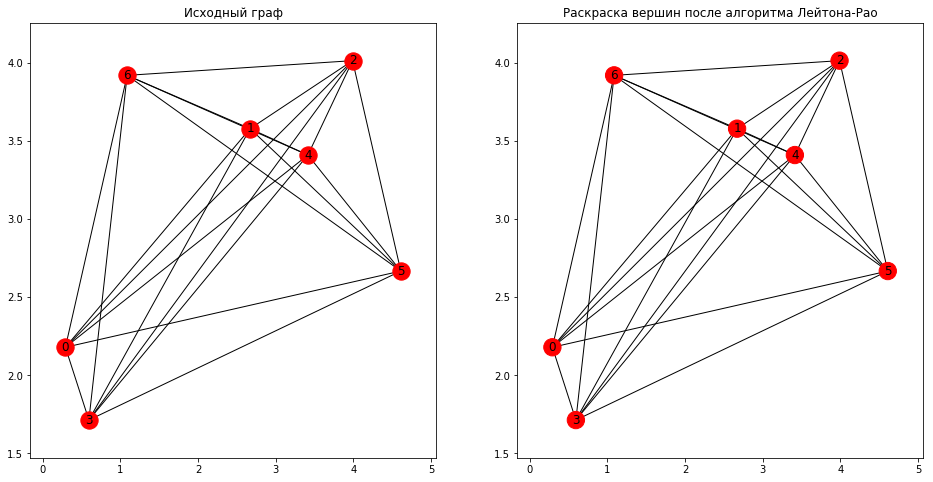

In [281]:
positions = generate_positions(g.n) 
pos = {i: tuple(xy) for i, xy in enumerate(positions)}

G=networkx.Graph() 
G.add_edges_from(g.edges) 
fixed_nodes = pos.keys()

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.title('Исходный граф')
pos = networkx.spring_layout(G, pos=pos, fixed = fixed_nodes) 
networkx.draw_networkx(G, pos, nodelist=[i for i in range(g.n)])

plt.subplot(1, 2, 2)
plt.title('Раскраска вершин после алгоритма Лейтона-Рао')
pos = networkx.spring_layout(G, pos=pos, fixed = fixed_nodes) 
networkx.draw_networkx(G, pos, nodelist=[i for i in range(g.n)], node_color=node_colors)

plt.show()

Видим, что в случае полного графа, из ЗЛП минимум оптимизаионной функции достигнится, когда в одном множеств, которое обращует разрез, будут все вершины.

### 2 слабосвязанных графа $K_{10}$

In [284]:
edges_1 = random_graph_list(10, 1)
edges_2 = random_graph_list(10, 1)
edges_2 = np.array(edges_2) + np.array([10, 10])
edges_2 = [tuple(edges_2[i]) for i in range(len(edges_2))]
edges = edges_1 + edges_2 + [(0, 12), (3, 18), (0, 15), (0, 14), (6, 11)]


g = Graph()
g.create_by_edges(edges)
d = g.Leiton_Rao()
node_colors = g.get_colors()

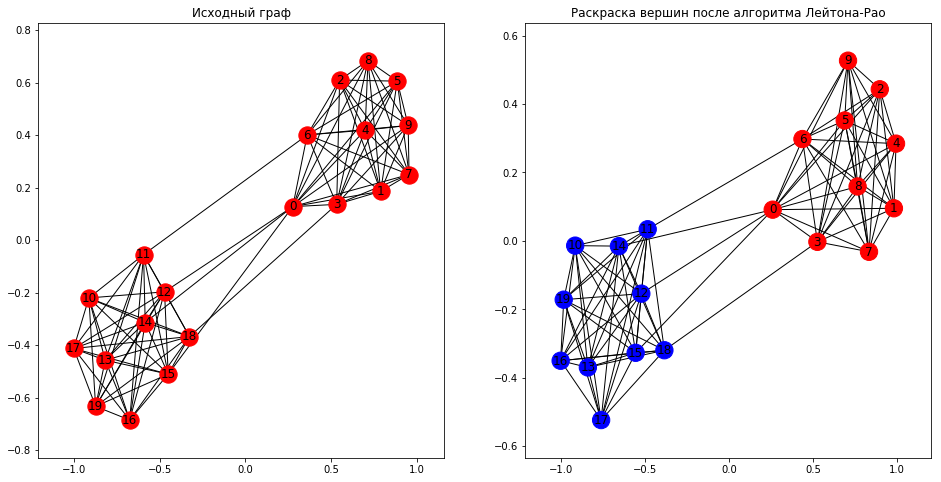

In [300]:
G=networkx.Graph() 
G.add_edges_from(g.edges) 

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.title('Исходный граф')
pos = networkx.spring_layout(G) 
networkx.draw_networkx(G, nodelist=[i for i in range(g.n)])

plt.subplot(1, 2, 2)
plt.title('Раскраска вершин после алгоритма Лейтона-Рао')
pos = networkx.spring_layout(G) 
networkx.draw_networkx(G, nodelist=[i for i in range(g.n)], node_color=node_colors)

plt.show()

Алгоритм отработал корректно

### Случайный граф на 20 вершинах с вероятностью появления ребра 0.5

In [24]:
%%time
g = Graph()
g.create_by_n_p(20, 0.5)
d = g.Leiton_Rao()
node_colors = g.get_colors()

CPU times: user 7.17 s, sys: 103 ms, total: 7.27 s
Wall time: 7.18 s


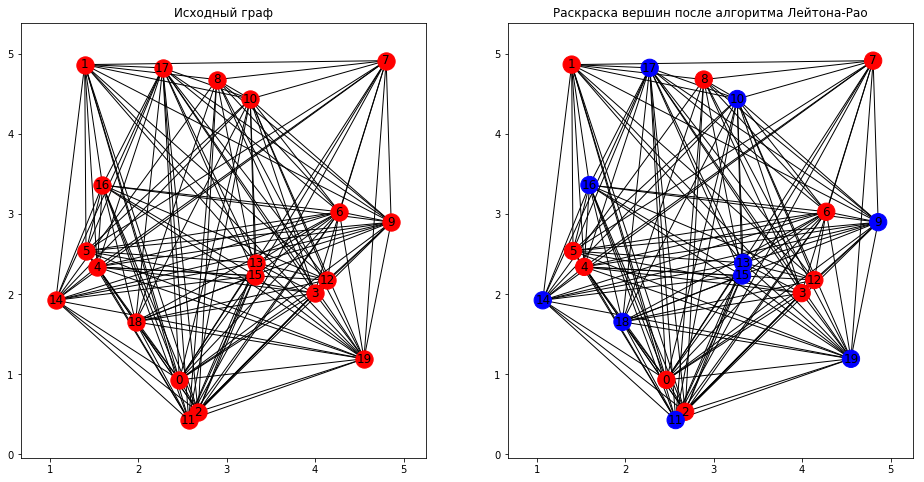

In [26]:
positions = generate_positions(g.n) 
pos = {i: tuple(xy) for i, xy in enumerate(positions)}

G=networkx.Graph() 
G.add_edges_from(g.edges) 
fixed_nodes = pos.keys()

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.title('Исходный граф')
pos = networkx.spring_layout(G, pos=pos, fixed = fixed_nodes) 
networkx.draw_networkx(G, pos, nodelist=[i for i in range(g.n)])

plt.subplot(1, 2, 2)
plt.title('Раскраска вершин после алгоритма Лейтона-Рао')
pos = networkx.spring_layout(G, pos=pos, fixed = fixed_nodes) 
networkx.draw_networkx(G, pos, nodelist=[i for i in range(g.n)], node_color=node_colors)

plt.show()

In [35]:
min_phi = 100000
for i, S in tqdm(enumerate(powerset(range(20)))):
    if i > 60000:
        break
    if len(S) == 0:
        continue
    now_phi = calc_phi(g.adjacency_matrix, S)
    if min_phi > now_phi:
        min_phi = now_phi


0it [00:00, ?it/s]
471it [00:00, 4671.05it/s]
881it [00:00, 4378.79it/s]
1275it [00:00, 4232.90it/s]
1598it [00:00, 3978.33it/s]
1897it [00:00, 3783.43it/s]Exception in thread Thread-10:
Traceback (most recent call last):
  File "/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/local/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

59937it [00:28, 2096.12it/s]


In [42]:
print('LR(G) = {} <= phi(G) = {} <= log(|V|)LR(G) = {}'.format(round(g.LR, 3), 
                                                               round(min_phi, 3), 
                                                               round(np.log(20) * g.LR, 3)))
print(g.LR < min_phi < np.log(20) * g.LR)

LR(G) = 0.6 <= phi(G) = 0.627 <= log(|V|)LR(G) = 1.797
True


### Случайный граф на 20 вершинах с вероятностью появления ребра 0.2

In [314]:
%%time
g = Graph()
g.create_by_n_p(20, 0.2)
d = g.Leiton_Rao()
node_colors = g.get_colors()

CPU times: user 7.06 s, sys: 72.9 ms, total: 7.13 s
Wall time: 7.05 s


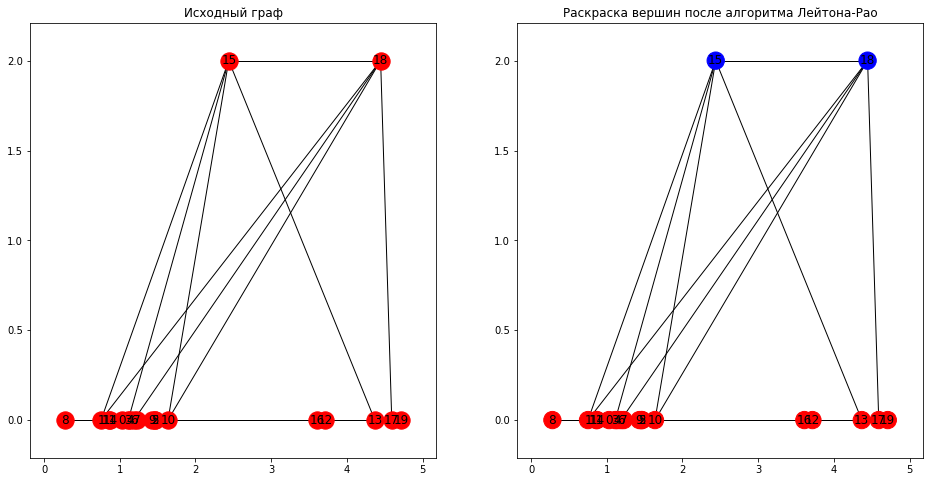

In [315]:
positions = generate_positions(g.n) 
pos = {i: (xy[0], 0) if node_colors[i] == 'r' else (xy[1], 2) for i, xy in enumerate(positions)}

G=networkx.Graph() 
G.add_edges_from(g.edges) 
fixed_nodes = pos.keys()

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.title('Исходный граф')
pos = networkx.spring_layout(G, pos=pos, fixed = fixed_nodes) 
networkx.draw_networkx(G ,pos, nodelist=[i for i in range(g.n)])

plt.subplot(1, 2, 2)
plt.title('Раскраска вершин после алгоритма Лейтона-Рао')
pos = networkx.spring_layout(G, pos=pos, fixed = fixed_nodes) 
networkx.draw_networkx(G, pos, nodelist=[i for i in range(g.n)], node_color=node_colors)

plt.show()

### Граф $K_{3, 3}$

In [316]:
edges = [(0, 3), (0, 4), (0, 5), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5)]

In [317]:
g = Graph()
g.create_by_edges(edges)
d = g.Leiton_Rao()
node_colors = g.get_colors()

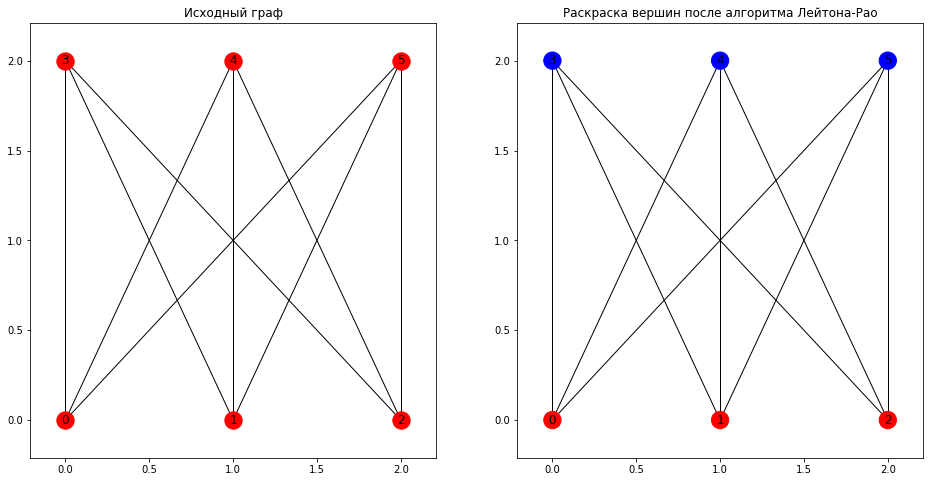

In [319]:
positions = generate_positions(g.n) 
pos = {0: (0, 0), 1: (1, 0), 2: (2, 0), 3: (0, 2), 4: (1, 2), 5: (2, 2)}

G=networkx.Graph() 
G.add_edges_from(g.edges) 
fixed_nodes = pos.keys()

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.title('Исходный граф')
pos = networkx.spring_layout(G, pos=pos, fixed = fixed_nodes) 
networkx.draw_networkx(G, pos, nodelist=[i for i in range(g.n)])

plt.subplot(1, 2, 2)
plt.title('Раскраска вершин после алгоритма Лейтона-Рао')
pos = networkx.spring_layout(G, pos=pos, fixed = fixed_nodes) 
networkx.draw_networkx(G, pos, nodelist=[i for i in range(g.n)], node_color=node_colors)

plt.show()

Тут видим, что алгоритм все-таки выделил не самое лучше разбиение: можно выбрать одну вершину, тогда оптимизируемая функция равна $\frac{3}{5}$, а в нашем случае равна $\frac{5}{6}$, но тут можно сослаться на приближенность вычисления, специфичность и малый размер графа

### Случайный граф на 50 вершинах с вероятностью появления ребра 0.2 (тут смотрим скорее на скорость работы, чем на точность, потому что сравнить ее  не получится (перебор 2^50))

In [5]:
%%time
g = Graph()
g.create_by_n_p(50, 0.2)
d = g.Leiton_Rao()
node_colors = g.get_colors()

CPU times: user 2min 26s, sys: 1.71 s, total: 2min 27s
Wall time: 2min 23s


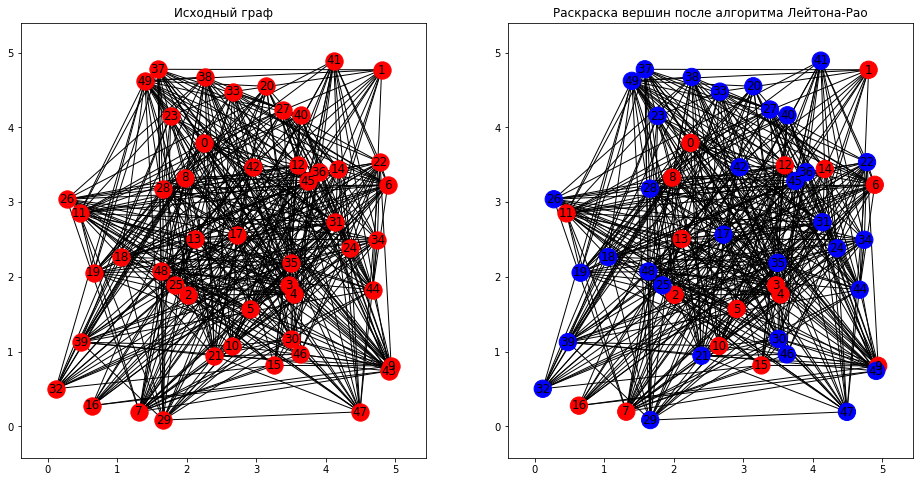

In [7]:
positions = generate_positions(g.n) 
pos = {i: tuple(xy) for i, xy in enumerate(positions)}

G=networkx.Graph() 
G.add_edges_from(g.edges) 
fixed_nodes = pos.keys()

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.title('Исходный граф')
pos = networkx.spring_layout(G, pos=pos, fixed = fixed_nodes) 
networkx.draw_networkx(G, pos, nodelist=[i for i in range(g.n)])

plt.subplot(1, 2, 2)
plt.title('Раскраска вершин после алгоритма Лейтона-Рао')
pos = networkx.spring_layout(G, pos=pos, fixed = fixed_nodes) 
networkx.draw_networkx(G, pos, nodelist=[i for i in range(g.n)], node_color=node_colors)

plt.show()

# 6.  Пара слов о теореме Ароры-Рао-Визарини

Подобно $l^1$ - полуметрикам введем понятие **полуметрики негативного типа** (больше склонен ее называть $l^2$ - полуметрикой)

$d$ является **полуметрикой негативного типа**, если $d$ -- полуметрика, имеющая вид $d(u, v) = ||f(u) - f(v)||^2$


Теперь, подобно апроксимации Лейтона-Рао, введем **апроксимацию Гёманса-Линиала**:

$$GL(G) = \min\limits_{d\colon M\times M\to \mathbb {R}, \ \  d -- l^2 полуметрика}  \dfrac{\sum_{i, j} adj_{i,j} \ d(x,\;y) }{\sum_{i, j} d(x,\;y)}$$


Апроксимацию Гёманса-Линиала решаем тоже с помощью ЗЛП:

В [3] утверждается и доказывается, что минимум $\frac{|V|}{2}GL(G)$ совпадает с минимумом в задаче:

$$\sum_{(u, v) \in E(G)}|| x_u - x_v ||^2 \to \min$$

$$\sum_{(u, v) \in V(G)}|| x_u - x_v ||^2 = |V|^2$$

$$\forall \; u, \; v, \; w \; || x_u - x_w ||^2 + || x_w - x_v ||^2  \geq || x_u - x_v ||^2 \; x_u \in \mathbb{R}^m$$


### Теорема Ароры-Рао-Визарини (AVR Theorem)

Существует такая константа $c$, что $\phi(G) \leq c \sqrt{\log n} \ GL(G)$

Эта теорема доказывается перебором случаем и применением теоремы Бургейна.

# 7. Заключение

Была изучена задача о наименее плотном разрезе. Реализован алгоритм Лейтона-Рао приближенного вычисления этой задачи.

Решение этой задачи (хоть даже и приближенное) нашло применение в компьютерной графике, где мы работаем с графом, вершины которого есть треугольные сетки, а ребра -- факт того, что треугольники соседние. 

<img src="img2.png" width=400>

Для быстрой работы с такими объектами нам требуется разделить его на несколько мелкие части, которые как можно меньше связаны друг с другом:
<img src="img1.png" width=400>

# 8. Литература

[1] Luca Trevisan, Spectral Graph Theory and Graph Partitioning (p. 36)

[2] Course by Stanford [CS359G](http://theory.stanford.edu/~trevisan/cs359g/) [lecture 8](https://lucatrevisan.wordpress.com/2011/02/02/cs359g-lecture-8-the-leighton-rao-relaxation/), 2017

[3] [Лекция от compscicenter](https://compscicenter.ru/courses/approximationalgo/2016-autumn/classes/2652/), Санкт-Петербург, 2016

[4] David W.Matula, Farhad Shahrokhi Sparsest cuts and bottlenecks in graphs, 1990